In [1]:
import pandas as pd
import matplotlib.pylab as plt
from	sklearn.cluster	import	KMeans
from scipy.spatial.distance import cdist 
import numpy as np


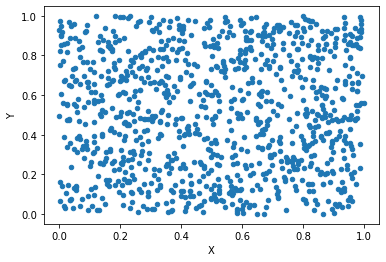

In [2]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.X = X
df_xy.Y = Y
df_xy.plot(x="X",y = "Y",kind="scatter")

In [3]:

X = np.random.uniform(0,1,1000)
X

array([0.79763863, 0.18521418, 0.24097115, 0.59052952, 0.22874094,
       0.28772219, 0.62089425, 0.26056228, 0.15533159, 0.86153772,
       0.06443313, 0.59699529, 0.45883056, 0.14861069, 0.4286069 ,
       0.24781869, 0.94784694, 0.8395276 , 0.98747771, 0.21017719,
       0.36192061, 0.23063534, 0.07059543, 0.31375403, 0.01639457,
       0.46028711, 0.83226932, 0.17037419, 0.60675785, 0.02974048,
       0.13751925, 0.33652558, 0.46889642, 0.88609495, 0.85714729,
       0.12543777, 0.55468113, 0.89587334, 0.01888254, 0.20919014,
       0.05312432, 0.18240816, 0.40126251, 0.30699073, 0.74883493,
       0.76634733, 0.3273247 , 0.11391283, 0.88952186, 0.95627526,
       0.7813266 , 0.59768263, 0.28115091, 0.469986  , 0.78318453,
       0.7887302 , 0.54413966, 0.5091228 , 0.17951022, 0.89831187,
       0.003412  , 0.75856904, 0.49236853, 0.91050292, 0.1652115 ,
       0.62990571, 0.55187748, 0.16171859, 0.571122  , 0.30752266,
       0.32253021, 0.0822444 , 0.15534586, 0.35932574, 0.57952

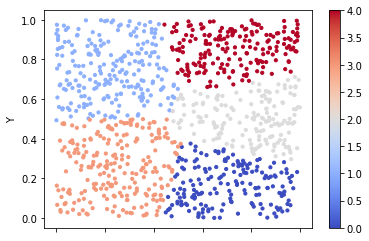

In [4]:
model1 = KMeans(n_clusters=5).fit(df_xy)

df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)


In [6]:
Univ = pd.read_csv("C:\\Users\\sathya\\Documents\\datascience\\Universities.csv")

In [7]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())	/	(i.max()	-	i.min())
    return (x)

# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Univ.iloc[:,1:])


df_norm.head(10)  # Top 10 rows


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


In [8]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)

model.labels_ # getting the labels of clusters assigned to each row 

array([3, 2, 4, 0, 0, 3, 3, 0, 3, 2, 3, 0, 0, 1, 3, 1, 3, 1, 4, 0, 4, 0,
       0, 1, 3])

In [9]:
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
Univ['clust']=md # creating a  new column and assigning it to new column 
df_norm.head()


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


In [10]:
Univ.iloc[:,1:7].groupby(Univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1270.000000,78.875,36.500000,12.375,24494.500000,90.250000
1,1061.500000,38.750,70.000000,19.250,9953.000000,71.750000
2,1360.000000,87.500,34.500000,6.500,61133.000000,84.000000
3,1356.875000,91.125,21.500000,10.875,33878.750000,94.500000
4,1226.666667,74.000,55.666667,14.000,18545.333333,78.333333


  Created wheel for dash: filename=dash-1.16.2-py3-none-any.whl size=82325 sha256=82ca678b5bf6af9b6446f4803f01f4f3810601aff16335264eb822eab3cc581e
  Stored in directory: c:\users\sathya\appdata\local\pip\cache\wheels\ad\ce\8c\f0a433a478be8773f043acc0587315d89b34dca6258c65786f
  Created wheel for Flask-Compress: filename=Flask_Compress-1.6.0-py3-none-any.whl size=6459 sha256=7402acbdb0c107ed80eee4d87f4c942454ecca460c91d792eefa9a0ec1bb2c43
  Stored in directory: c:\users\sathya\appdata\local\pip\cache\wheels\d7\32\f3\75187461831b61f38fe2c94984e2df58c7a6236f6bc0d26e46
  Created wheel for dash-daq: filename=dash_daq-0.5.0-py3-none-any.whl size=669707 sha256=85c3bec47864d3eb81aa20001e9c9ff259a43069a411962bdc13e1339490e11b
  Stored in directory: c:\users\sathya\appdata\local\pip\cache\wheels\00\35\e5\57e90f10c529601c6627400513cb65dd5adb09752411f5a050
  Created wheel for dash-colorscales: filename=dash_colorscales-0.0.4-py3-none-any.whl size=62603 sha256=2b21151cd0084c5a1346d7f4d950db3d7556fe

In [1]:
!pip install xlrd